### Observando la señal AM
Se grafica y observan las características de la señal AM

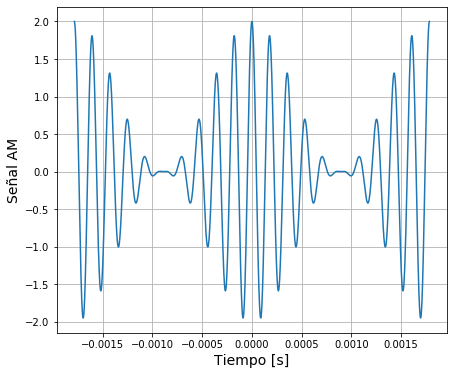

In [23]:
import numpy as np
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (7, 6)

# Establezco los parámetros del problema
fin = 2800
f1 = 1.8 * fin
f2 = 2 * fin
f3 = 2.2 * fin
fs = 10500
periods = 1
amplitude = 1
max_error = 0.02

time = np.arange(- periods * 2 / (f3 - f1), periods * 2 / (f3 - f1), 2 / (f3 - f1) / 10000)
values = [amplitude * (0.5*np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t) + 0.5*np.cos(2 * np.pi * f3 * t)) for t in time]

pyplot.plot(time, values)
pyplot.xlabel("Tiempo [s]", fontsize=14)
pyplot.ylabel("Señal AM", fontsize=14)
pyplot.grid()
pyplot.savefig("señal_am")
pyplot.show()

### Análisis de muestreo instantáneo óptimo de AM
Se desea muestrear una señal AM, con lo cual si bien la frecuencia está definida por el criterio de Nyquist, luego para el tiempo de retención es necesario tener en cuenta la repercusión sobre el espectro y cómo se distorsiona, dado que luego se busca recuperar la señal con un filtro pasabajos.

\begin{equation}
    Y(\omega) = \frac{\tau}{T} \cdot \sum_{n \in Z} X(\omega - \omega_T \cdot n) \cdot sinc(\frac{\omega \cdot \tau}{2})
\end{equation}

Entonces, lo que se propone es buscar en la frecuencia límite de la entrada y establecer un error de distorsión $\gamma$.

\begin{equation}
    \gamma = 1 - \frac{sin(\pi \cdot f_3 \cdot \tau)}{\pi \cdot f_3 \cdot \tau}
\end{equation}

In [5]:
import numpy as np
import random as rand

# Defino la función
def gamma(f3: float, tau: float):
    return 1 - (np.sin(np.pi * f3 * tau) / (np.pi * f3 * tau))

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


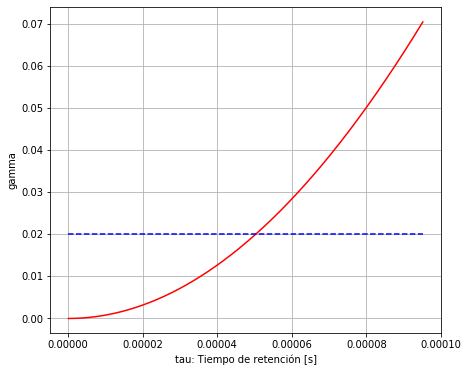

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


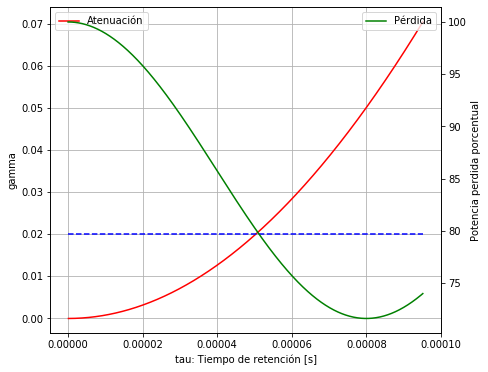

In [22]:
import numpy as np
from matplotlib import pyplot

def pi(ampl: float) -> float:
    return 2 * ampl**2

def po(ampl: float, ts: float, tau: float, wi: float):
    return ampl**2 * (tau / ts)**2 * (np.sinc((1.8 * wi * tau) / 2)**2 * 0.5 + np.sinc((2 * wi * tau) / 2)**2 + np.sinc((2.2 * wi * tau) / 2)**2 * 0.5)

def pperd(ampl: float, ts: float, tau: float, wi: float):
    p_in = pi(ampl)
    p_out = po(ampl, ts, tau, wi)
    return (1 - p_out / p_in) * 100


# Graficamos para cada valor posible de error
taus = np.arange(0, 1 / fs, 1 / (fs * 1000))
gammas = [gamma(f3, tau) for tau in taus]
pperds = [pperd(amplitude, 1 / fs, tau, 2 * np.pi * fin) for tau in taus]

fig, (ax1) = pyplot.subplots(1, 1)

ax1.plot(taus, gammas, label='Atenuación', color='r')
ax1.plot([0, 1/fs], [max_error, max_error], linestyle='dashed', color='blue')
ax1.set_ylabel("gamma")
ax1.set_xlabel("tau: Tiempo de retención [s]")
ax1.grid()
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(taus, pperds, label='Pérdida', color='g')
ax2.legend()
ax2.set_xlabel("tau: Tiempo de retención[s]")
ax2.set_ylabel("Potencia perdida porcentual")

pyplot.savefig("error_am_tau")
pyplot.show()